<a href="https://colab.research.google.com/github/gabrielludke/perceptron/blob/main/Perceptron_Gabriel_Ludke_Neural_Networks_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron
Neural Networks - 2024/1
Gabriel Giesen Ludke

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Classe de perceptron feito para apenas um atributo de saida
class perceptron:
    def __init__(self):
        self.w = np.array([])

    def __funcaoPerceptron(self, pesos,entrada):
        degrau = lambda x: 0 if x <= 0 else 1
        if len(np.shape(entrada)) > 1:
            return [degrau(np.matmul(pesos.T,entrada[i])) for i in range(np.size(entrada,0))]
        else:
            return degrau(np.matmul(pesos.T,entrada))

    def treinar(self, entradaTreinamento, saidaTreinamento, nEpocas, taxaAprendizado):
        # inicializa um array para armazenar os erros
        erro = np.array([0 for i in range(0, len(saidaTreinamento))])

        # Adicionando elemento extra para representar x0 em cada linha dos atributos de entrada
        entradaTreinamento = np.array([[1] + entradaTreinamento[i] for i in range(0, np.size(entradaTreinamento,0))])

        # Define valores iniciais aleatorios de w
        self.w = np.array([np.random.rand() for i in range(0, np.size(entradaTreinamento,1))])

        # roda no maximo o numero de epocas definido
        for i in range(0, nEpocas):
            # itera para cada combinacao de entrada
            for j in range(0, np.size(entradaTreinamento,0)):
                y = self.__funcaoPerceptron(self.w, entradaTreinamento[j])

                # armazena valor de erro
                erro[j] = saidaTreinamento[j] - y

                if erro[j] != 0:
                    # caso tenha erro, faz a correcao dos pesos
                    self.w = self.w + taxaAprendizado*erro[j]*entradaTreinamento[j]

            # Se os erros para todas as saidas forem nulos, finaliza o codigo
            if(np.sum(np.absolute(erro)) == 0):
                break

    def classificar(self, entrada):
        if len(np.shape(entrada)) > 1:
            entrada = np.array([[1] + entrada[i] for i in range(0, np.size(entrada,0))])
        else:
            entrada = np.array([1] + entrada)
        return self.__funcaoPerceptron(self.w, entrada)

In [ ]:
learningRate = 0.1
nEpochs = 10

In [ ]:
# Função para plotar resultados e a linha de separação das classes

def curvaPesos(w,x,y,title):
    # Gera X1 e X2
    x2 = np.array([sublista[1] for sublista in x])
    x1 = np.array([sublista[0] for sublista in x])

    # Gera arrays para imprimir a reta
    xaux = np.linspace(-4,5,10)
    yaux = (-w[0] - w[1]*xaux)/w[2] # baseado em w1x1 + w2x2 + w0 = 0

    color = ['red' if a == 1 else 'blue' for a in y]

    plt.plot(xaux, yaux, linestyle = '-', color = 'grey')
    plt.scatter(x1,x2, marker = '.', color = color)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-2,3)
    plt.ylim(-2,3)
    plt.title(title)
    plt.show()

Análise para AND

w= [-0.3579676   0.33164092  0.31837942]
bias = 0.35796760124401117
w1= 0.3316409248556613
w2= 0.3183794220568492
resultado = [0, 0, 0, 1]


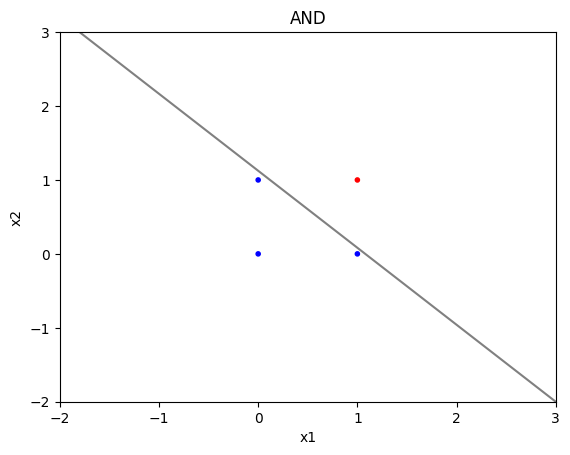

In [ ]:
# Define valores de treinamento.
x_train = [[0,0],[0,1],[1,0],[1,1]]
y_train = [0,0,0,1]

# cria um objeto da classe e treina o modelo
model = perceptron()
model.treinar(entradaTreinamento = x_train, saidaTreinamento = y_train, nEpocas = nEpochs, taxaAprendizado = learningRate)

print("w= "+ str(model.w))

for i in range(0, len(model.w)):
    if i == 0:
        print('bias = ' + str(-model.w[i]))
    else:
        print('w'+str(i)+"= " + str(model.w[i]))

# imprime os resultados para as entradas aplicando os pesos encontrados
resultado = model.classificar(x_train)

print('resultado = ' + str(resultado))

curvaPesos(model.w, x_train,y_train, 'AND')

Análise para OR

w= [-0.06009604  0.34285063  0.4373436 ]
bias = 0.06009604026765014
w1= 0.34285062992783233
w2= 0.4373436032890653
resultado = [0, 1, 1, 1]


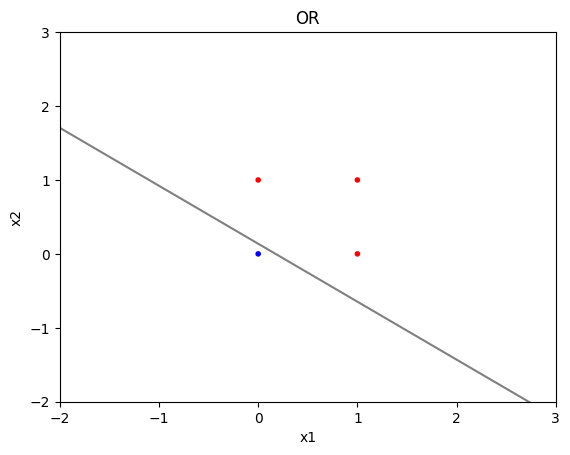

In [ ]:
# Define valores de treinamento.
x_train = [[0,0],[0,1],[1,0],[1,1]]
y_train = [0,1,1,1]

# cria um objeto da classe e treina o modelo
model = perceptron()
model.treinar(entradaTreinamento = x_train, saidaTreinamento = y_train, nEpocas = nEpochs, taxaAprendizado = learningRate)

print("w= "+ str(model.w))

for i in range(0, len(model.w)):
    if i == 0:
        print('bias = ' + str(-model.w[i]))
    else:
        print('w'+str(i)+"= " + str(model.w[i]))

# imprime os resultados para as entradas aplicando os pesos encontrados
resultado = model.classificar(x_train)

print('resultado = ' + str(resultado))

curvaPesos(model.w, x_train,y_train, 'OR')

Análise para XOR

w= [-0.0722532  -0.03864375 -0.01023681]
bias = 0.07225320346835548
w1= -0.03864375156771213
w2= -0.010236811982924393
resultado = [0, 0, 0, 0]


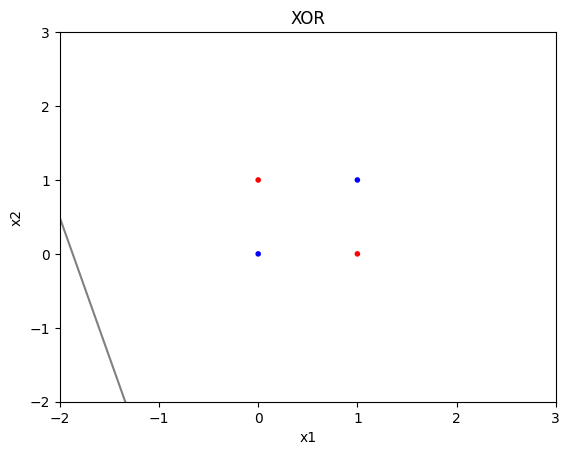

In [ ]:
# Define valores de treinamento.
x_train = [[0,0],[0,1],[1,0],[1,1]]
y_train = [0,1,1,0]

# cria um objeto da classe e treina o modelo
model = perceptron()
model.treinar(entradaTreinamento = x_train, saidaTreinamento = y_train, nEpocas = nEpochs, taxaAprendizado = learningRate)

print("w= "+ str(model.w))

for i in range(0, len(model.w)):
    if i == 0:
        print('bias = ' + str(-model.w[i]))
    else:
        print('w'+str(i)+"= " + str(model.w[i]))

# imprime os resultados para as entradas aplicando os pesos encontrados
resultado = model.classificar(x_train)

print('resultado = ' + str(resultado))

curvaPesos(model.w, x_train,y_train, 'XOR')

Análise para NOT

In [ ]:
# Define valores de treinamento. Para o NOT, como a dimensao de saida e a de entrada sao iguais, e a classe construida suporta apenas saidas unidimensionais, as entradas precisam ter 1 dimensao tambem
x_train = [[0],[1]]
y_train = [1,0]

# cria um objeto da classe e treina o modelo
model = perceptron()
model.treinar(entradaTreinamento = x_train, saidaTreinamento = y_train, nEpocas = nEpochs, taxaAprendizado = learningRate)

print("w= "+ str(model.w))

for i in range(0, len(model.w)):
    if i == 0:
        print('bias = ' + str(-model.w[i]))
    else:
        print('w'+str(i)+"= " + str(model.w[i]))

# imprime os resultados para as entradas aplicando os pesos encontrados
resultado = model.classificar(x_train)

print('resultado = ' + str(resultado))

w= [ 0.01009108 -0.02813946]
bias = -0.01009107802641715
w1= -0.02813945672066051
resultado = [1, 0]
